<i>Written by: Laura Brin, Sandra Alex & Annabell Rodriguez, On behalf of Norquest College Institute for the CMPT-3510 Machine Learning I Fall course</i>

# House Price Regression

In [360]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# loading the house sales csv data
df = pd.read_csv("kc_house_data.csv")

# This makes it so we are able to see 100 rows when displaying the data
pd.set_option("display.max_rows", 100)

### Problem definition

space saver

In [361]:
#code saver

### Data Cleaning-Laura

sapce saver

In [362]:
#code saver

In [363]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [364]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [365]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [366]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Cleaning Notes**: <br>
need to change date- strip T00 and convert to_datetime <br>
yr_renovated change 0 to NaN <br>
waterfront to binary <br>
grade to categories then encode <br>
sqft_living, sqft_lot, sqft_above, sqft_below, sqft_living15, sqft_lot15 could normalize <br>
condition and view are both categorical, but as they are currently numerical and ordinal there is no needed cleaning



date:

In [367]:
df_clean=df.copy()
df_clean["date"].str.rstrip("T000000")

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

In [368]:
df_clean["date"]=pd.to_datetime(df_clean["date"])
df_clean["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

yr_renovated: NaN for missing years

In [369]:
df_clean["yr_renovated"].replace(0,np.NaN, inplace=True)

waterfront:

In [370]:
df_clean["waterfront"].unique()

array([0, 1], dtype=int64)

In [371]:
df_clean["waterfront"]=df_clean["waterfront"].astype(bool)

grade: categorize and encode

In [372]:
df_clean["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [373]:
df_clean["grade"]=pd.cut(df_clean["grade"],bins=[1,4,11,13],labels=["low","average","high"])

In [374]:
df_clean=pd.get_dummies(df_clean, columns=["grade"],prefix="grade", drop_first=True)

In [375]:
df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_average,grade_high
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,False,0,...,0,1955,NaN,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0,...,0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0,...,910,1965,NaN,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0,...,0,1987,NaN,98074,47.6168,-122.045,1800,7503,1,0


In [376]:
df_clean.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
grade_average             uint8
grade_high                uint8
dtype: object

**remove after features described**
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Data Visualization

<AxesSubplot: >

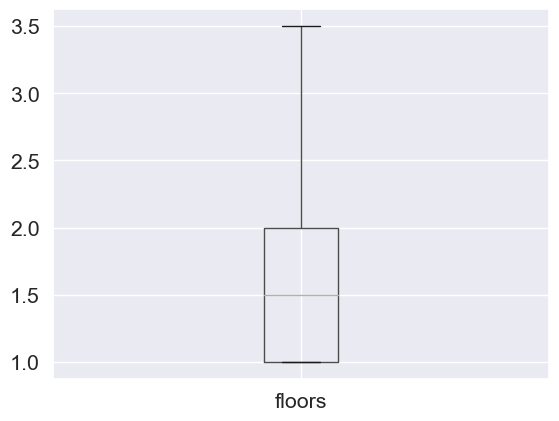

In [387]:
#df_clean.boxplot(column="price")
#df_clean.boxplot(column="bedrooms")
#df_clean.boxplot(column="bathrooms")
#df_clean.boxplot(column="sqft_living")
#df_clean.boxplot(column="sqft_lot")
#df_clean.boxplot(column="floors")
#df_clean.boxplot(column="sqft_above")
#df_clean.boxplot(column="sqft_basement")
#df_clean.boxplot(column="yr_built")
#df_clean.boxplot(column="sqft_living15")
#df_clean.boxplot(column="sqft_lot15")

**insights from boxplots** <br>
All features except yr_built and floors showed significant collective outliers. <br> 
Bedrooms had a single global outlier >30. sqft_living has a potential global outlier at 12000 sqft.  <br>
Not checked: lat, long and zipcode as they are geographic location features. <br>
Not checked: waterfront as it is binary; condition and grade are catagorical; view is a 1-5 scale; yr_renovated NaN values <br>


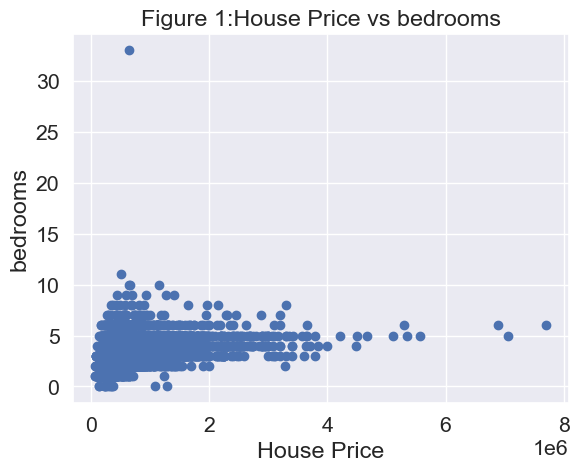

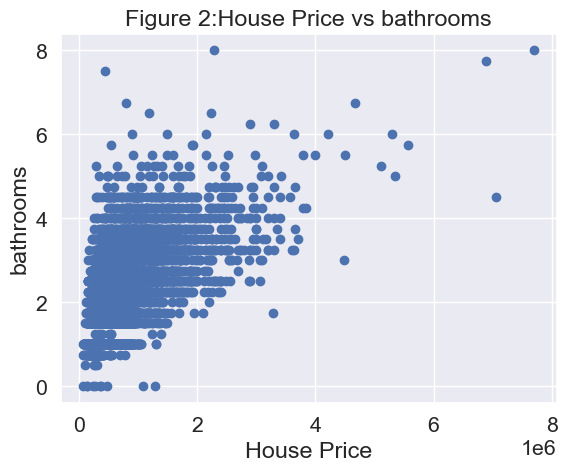

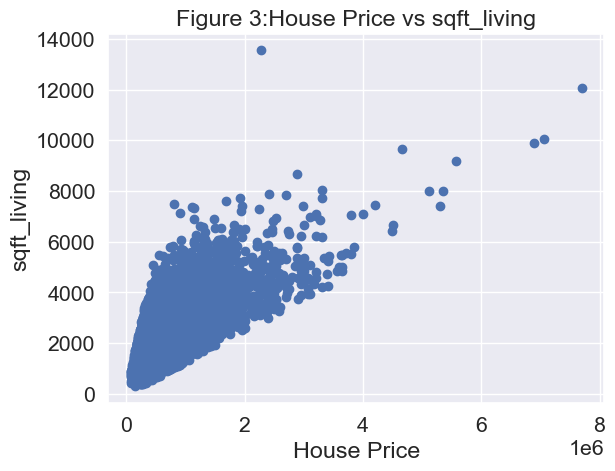

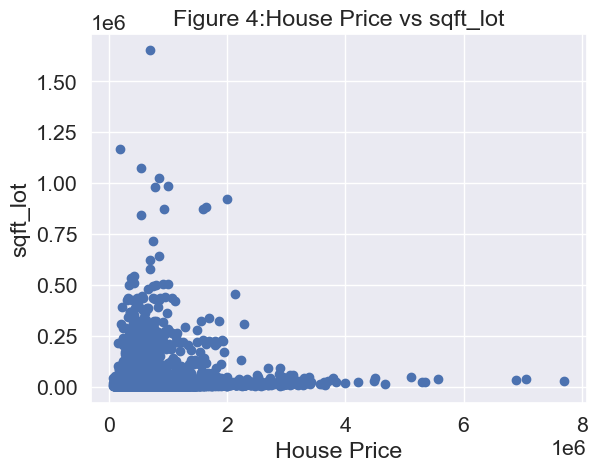

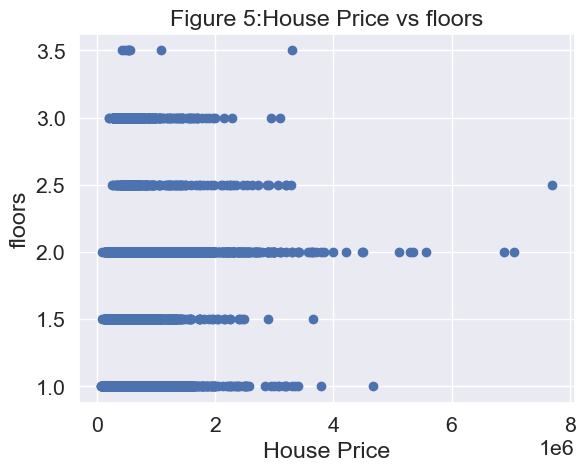

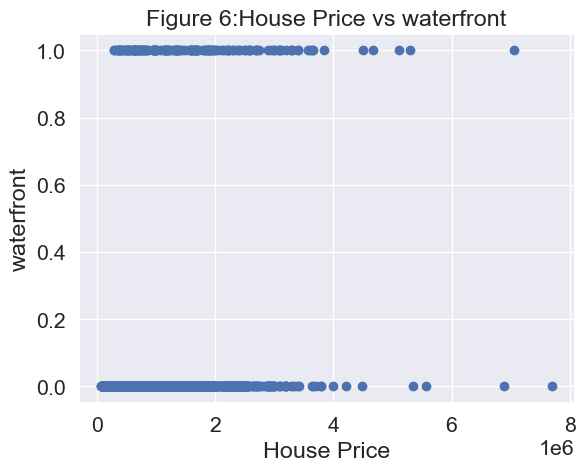

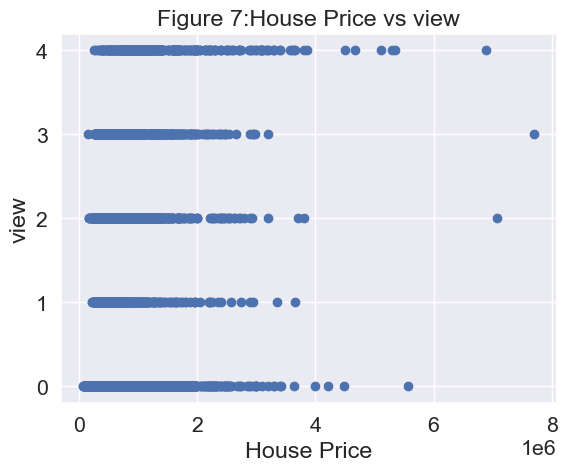

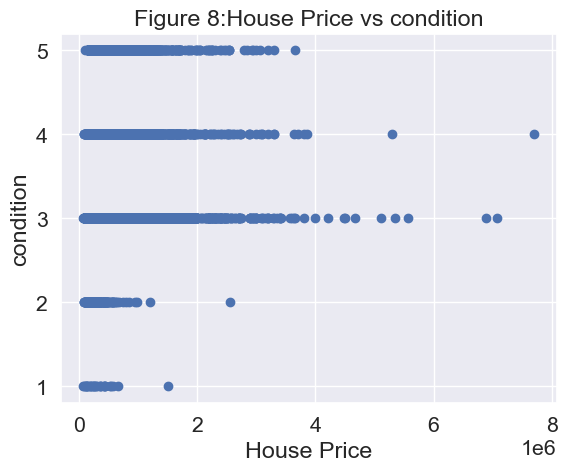

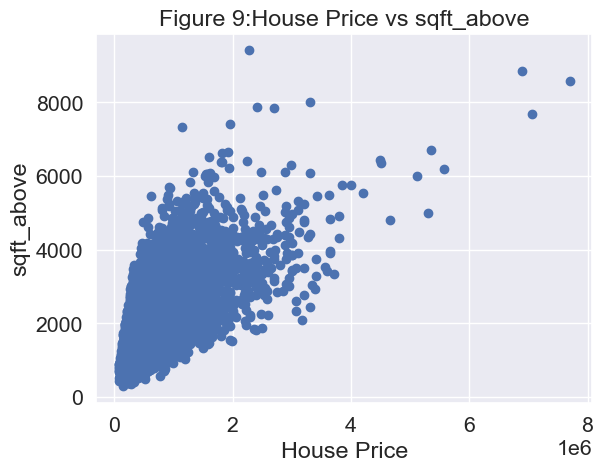

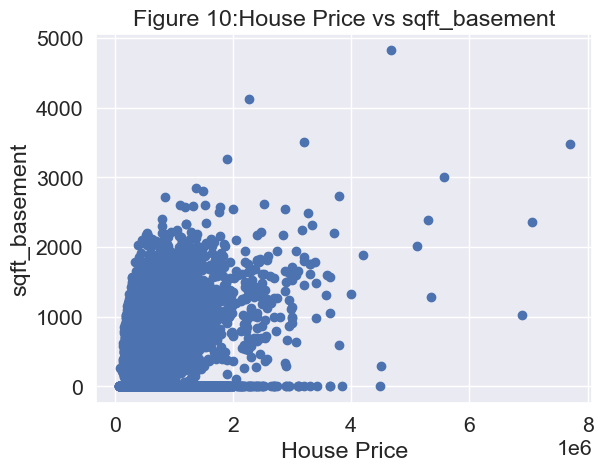

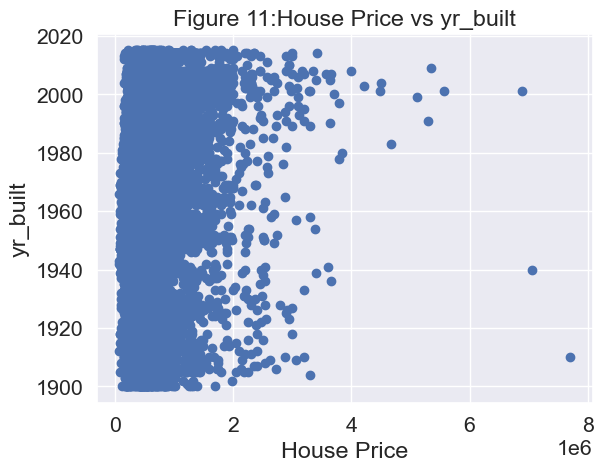

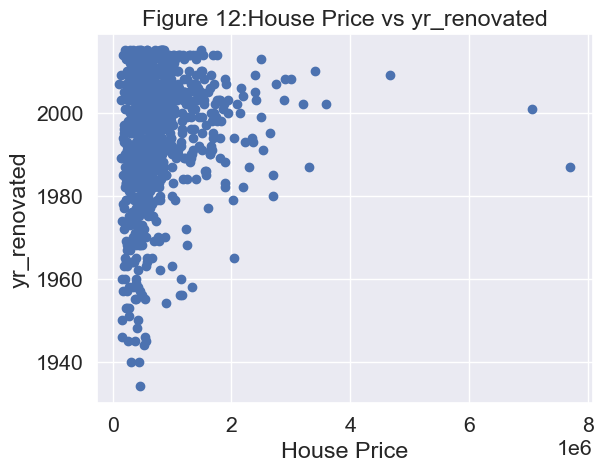

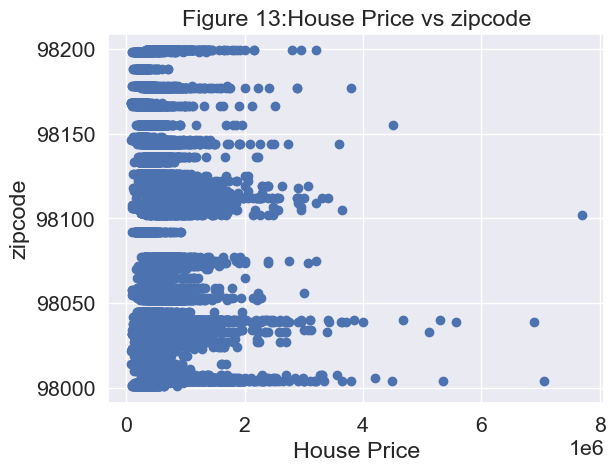

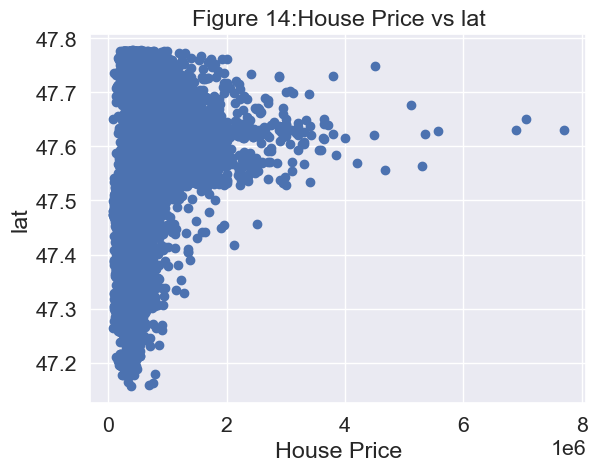

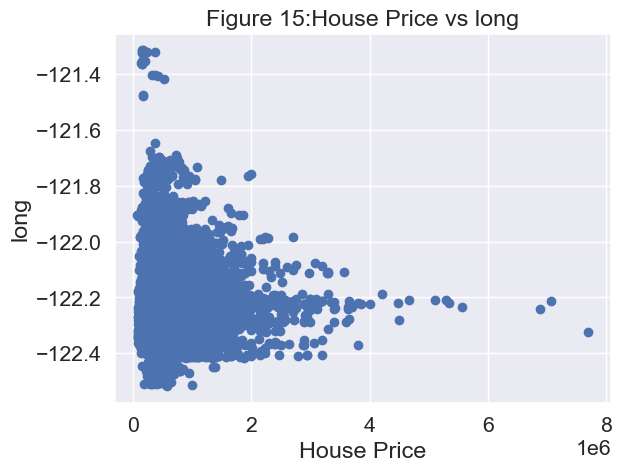

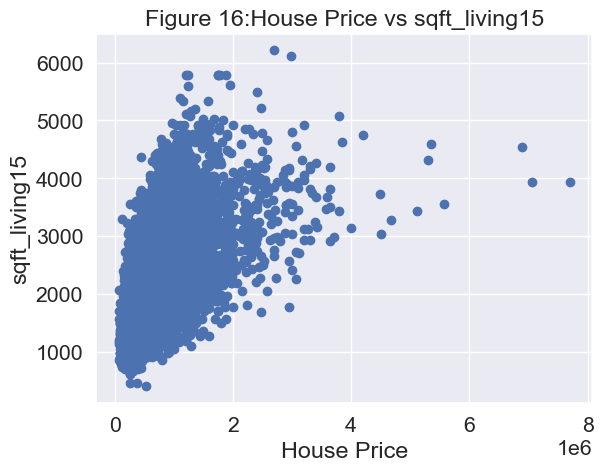

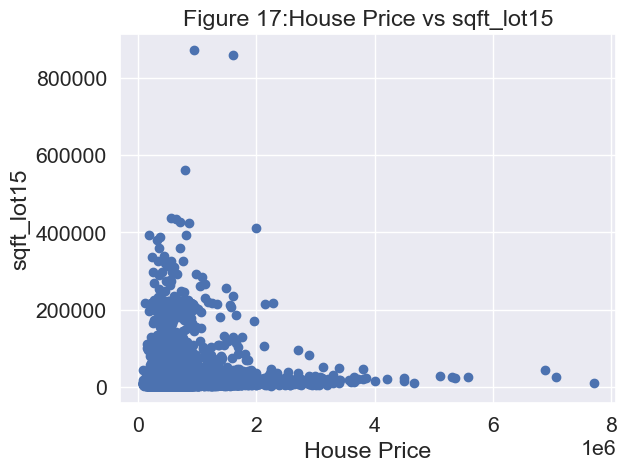

In [378]:
features=df_clean.columns
features=features.drop(["id","date","price","grade_average","grade_high"])
graph=1
for col in features:
    fig=plt.scatter(df_clean["price"],df_clean[col])
    plt.xlabel("House Price")
    plt.ylabel(f"{col}")
    plt.title(f"Figure {graph}:House Price vs {col}")
    plt.show()
    graph+=1

**Insights from scatterplots**: <br>
living space square footage appears to have a lower bound where house price will not exceed $200/sqft <br>
upper floor sqft has obvious correlation with total living space sqft <br>
appears to be a positive correlation with condition of house and price (at least at higher prices) <br>
view rating and waterfront did not have obvious strong coorelation with house price. <br>
There appears to be a specific lat-long that correlated to the most expensive properties (Bellevue neighbourbhood in Seattle).

sqft living and sqft lot each have 1 global outlier to remove. sqft_lot15 has 2 global outliers to remove


[Text(0.5, 1.0, 'Figure 18:Heatmap of Correlation for Housing features')]

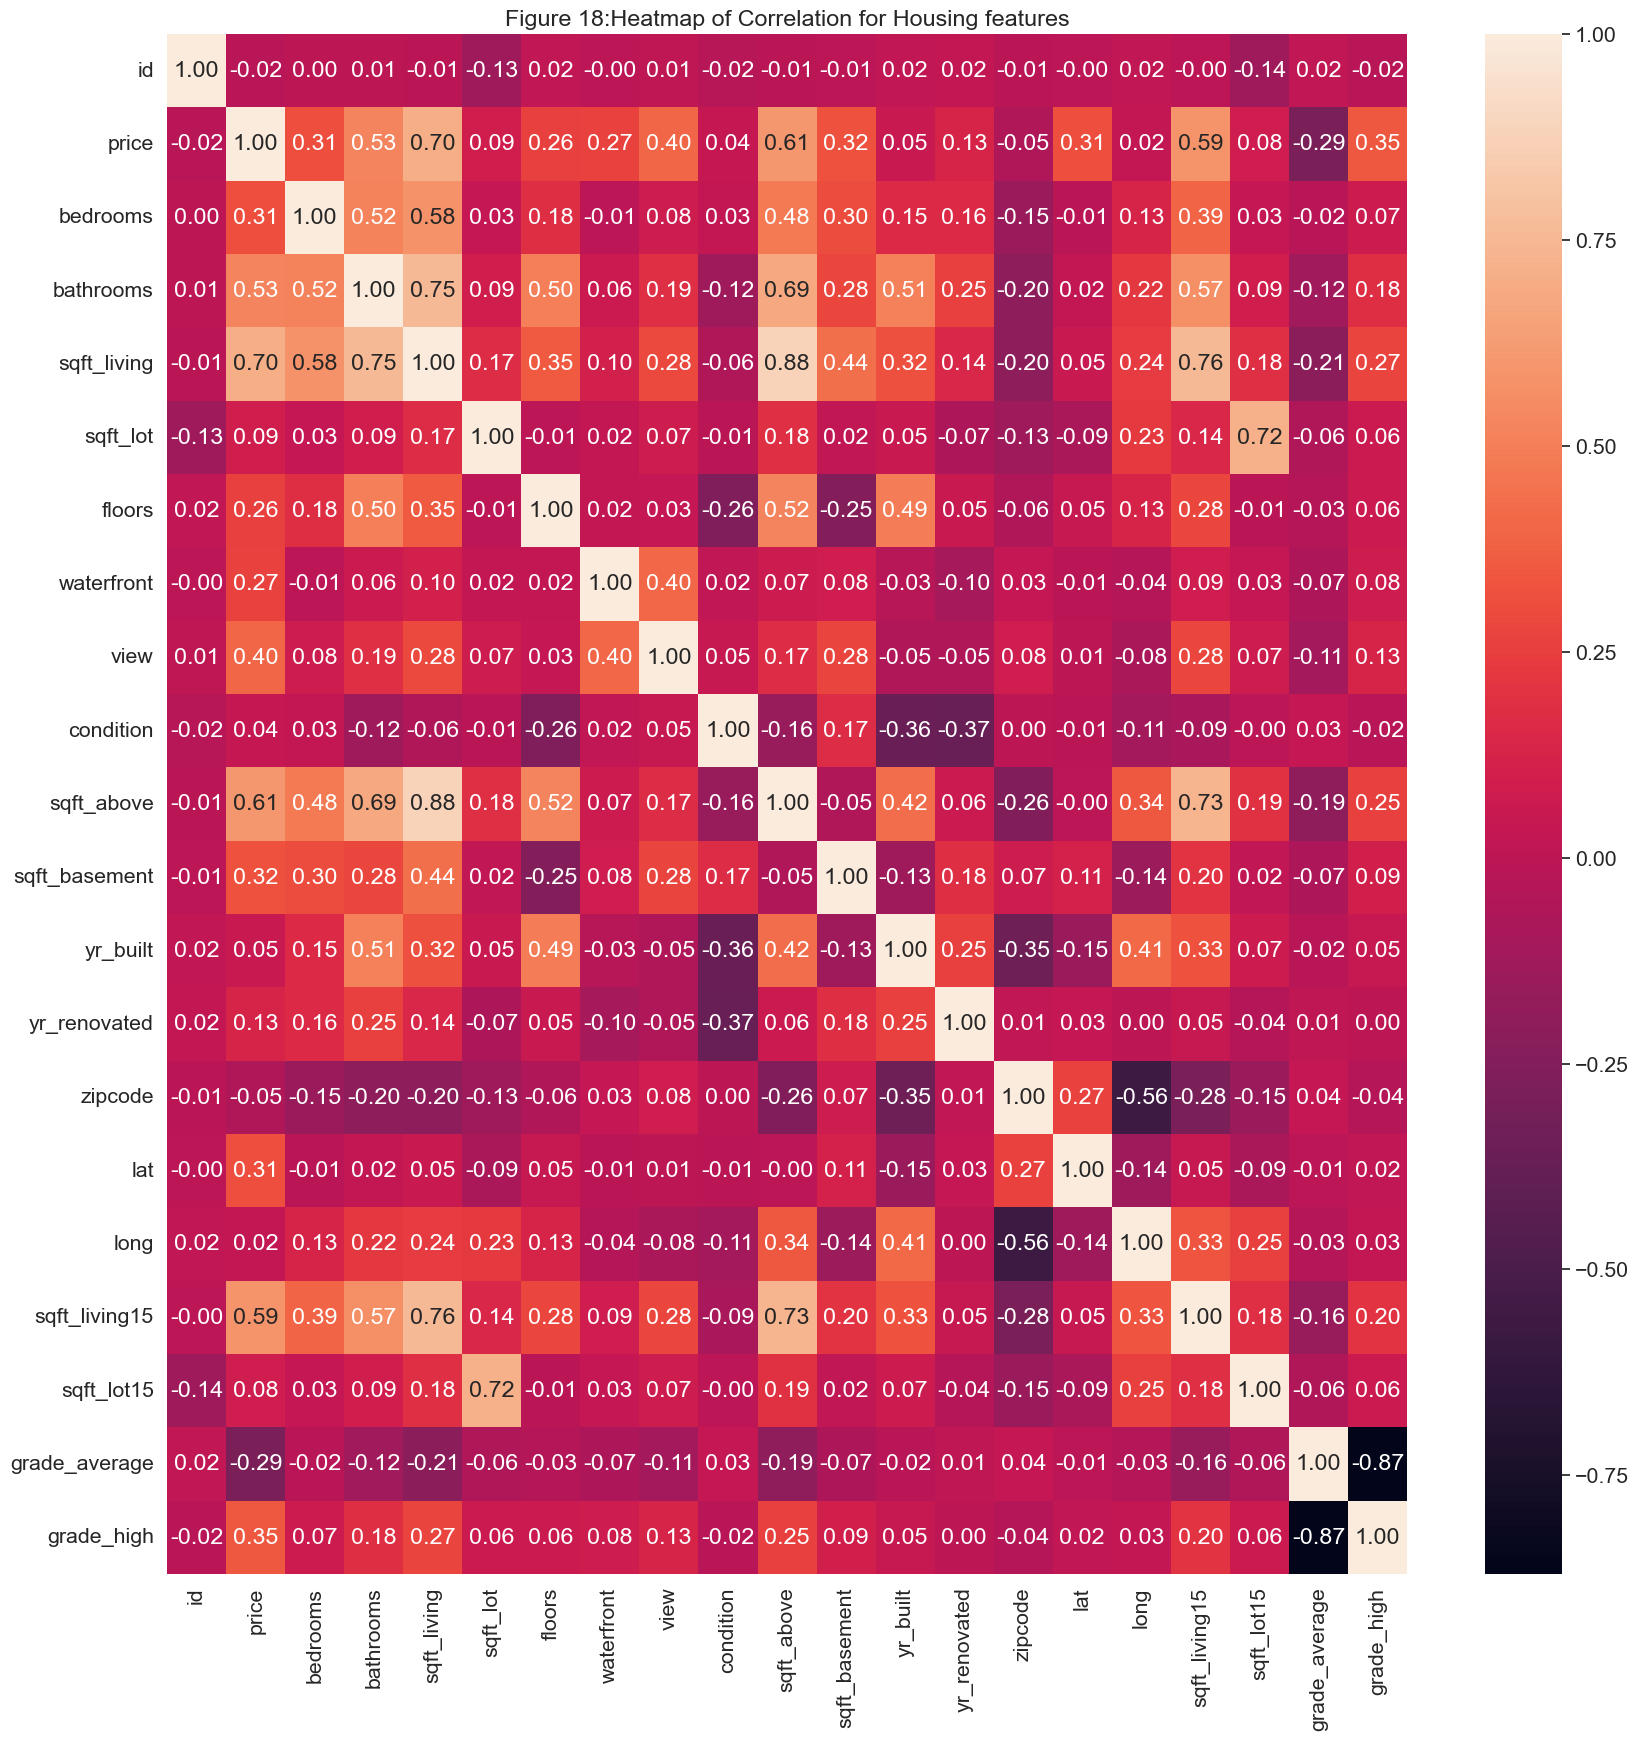

In [379]:
corr=df_clean.corr()

correlation_heatmap=plt.figure(num=None, figsize=(20,20))
correlation_heatmap=sns.heatmap(data=corr,annot=True, fmt='.2f').set(title="Figure 18:Heatmap of Correlation for Housing features")
sns.set(font_scale=1.4)

correlation_heatmap

**Insights from correlation plot** <br>
Price is moderately correlated with sqft_living, sqft_above and sqft_living15. Bedrooms and bathrooms have low correlation with price but moderate correlation with sqft_living. View has a higher correlation than waterfront. While the latitude and longitude had clear patterns in the scatterplots, only the latitue shows a minor correlation. 

From data visualizations the following cleaning is required: <br>
* remove bedroom, sqft_living, sqft_lot, and sqft_lot15 outliers
* normalize lat and long values

In [380]:
df_clean.drop(df_clean[df_clean["bedrooms"]>30].index, inplace=True)
df_clean.drop(df_clean[df_clean["sqft_living"]>13000].index, inplace=True)
df_clean.drop(df_clean[df_clean["sqft_lot"]>1500000].index, inplace=True)
df_clean.drop(df_clean[df_clean["sqft_lot15"]>800000].index, inplace=True)

In [381]:
scaler=MinMaxScaler()
lat_array=df_clean["lat"].values.reshape(-1,1)
long_array=df_clean["long"].values.reshape(-1,1)

df_clean["lat_norm"]=normalize(lat_array, axis=0)
df_clean["long_norm"]=normalize(long_array, axis=0)

[Text(0.5, 1.0, 'Figure 19: Heatmap of Correlation for Housing features')]

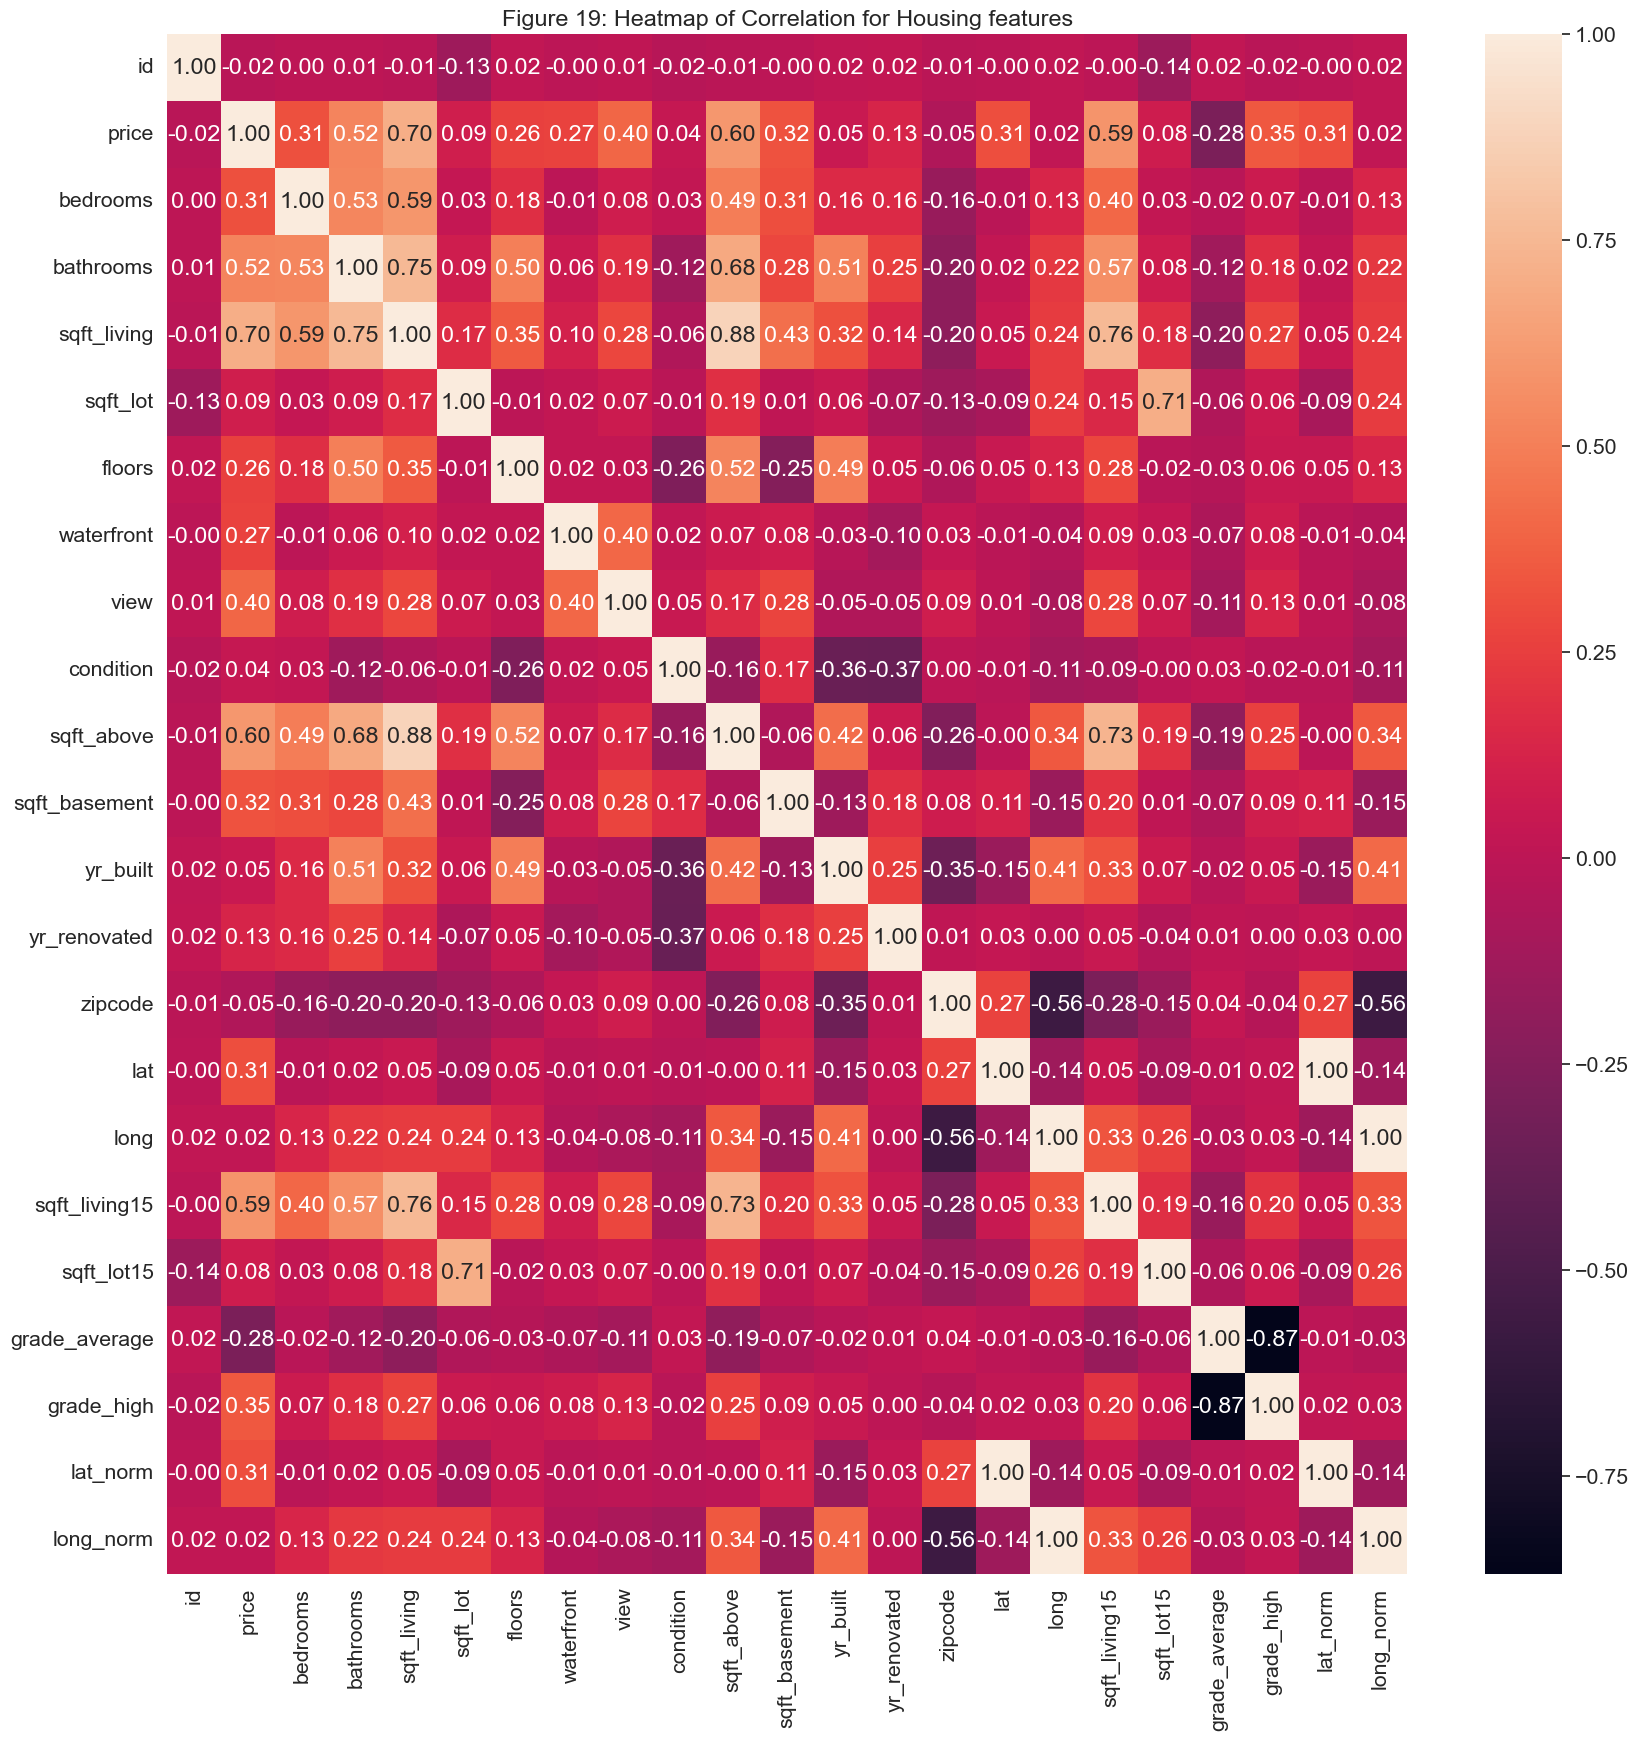

In [382]:
corr2=df_clean.corr()

correlation_heatmap2=plt.figure(num=None, figsize=(20,20))
correlation_heatmap2=sns.heatmap(data=corr2,annot=True, fmt='.2f').set(title="Figure 19: Heatmap of Correlation for Housing features")
sns.set(font_scale=1.4)

correlation_heatmap2

normalizing latitude did not have any markable result, normalizing longitude did have an effect of increasing correlation with price but only to low levels <b>


**Reminder**
column grade needs to be removed from dataset used for regression model 

could also seperate data into 2 different models- high price and low price, so that the high outliers do not skew the data (<4M, >4M)?

### Regression

space saver

In [384]:
#code saver